In [54]:
import pickle as pkl
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


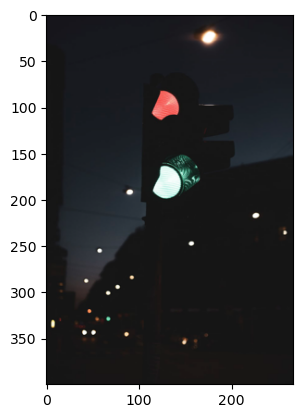

In [55]:
with open('images.pkl', 'rb') as f:
    images = pkl.load(f)

plt.imshow(images[0])

In [56]:
with open('target.pkl', 'rb') as f:
    labels = pkl.load(f)

print(labels[0])

trafficlight


In [57]:
# Get all the sizes into a list, then convert to a set
sizes = set([img.shape for img in images])
print(sizes)

{(273, 400, 3), (257, 400, 3), (235, 400, 3), (400, 267, 3), (400, 300, 3), (248, 400, 3), (270, 400, 3), (246, 400, 3), (400, 306, 3), (385, 400, 3), (242, 400, 3), (266, 400, 3), (244, 400, 3), (222, 400, 3), (267, 400, 3), (400, 332, 3), (268, 400, 3), (400, 268, 3), (166, 400, 3), (290, 400, 3), (229, 400, 3), (228, 400, 3), (301, 400, 3), (269, 400, 3), (281, 400, 3), (400, 321, 3), (200, 400, 3), (400, 266, 3), (302, 400, 3), (400, 400, 3), (252, 400, 3), (337, 400, 3), (293, 400, 3), (265, 400, 3), (300, 400, 3), (247, 400, 3), (225, 400, 3), (272, 400, 3), (364, 400, 3), (400, 395, 3), (283, 400, 3), (400, 320, 3), (227, 400, 3), (400, 254, 3), (284, 400, 3), (274, 400, 3)}


In [58]:
sizes_df = pd.DataFrame([[img.shape[0], img.shape[1]] for img in images], columns=['height', 'width'])
sizes_df['height'].value_counts()

height
400    782
267     31
301     13
300      7
225      5
269      4
228      2
247      2
266      2
273      2
283      2
293      1
222      1
166      1
244      1
252      1
337      1
281      1
265      1
302      1
235      1
200      1
274      1
246      1
364      1
385      1
242      1
272      1
270      1
290      1
284      1
268      1
257      1
229      1
248      1
227      1
Name: count, dtype: int64

In [59]:
sizes_df['width'].value_counts()

width
300    731
400     99
267     29
320      6
268      5
266      2
306      1
321      1
395      1
254      1
332      1
Name: count, dtype: int64

In [60]:
images[0].shape

(400, 267, 3)

In [61]:
target_size = (300, 400)

cv2.resize(images[0], (300, 400)).shape

(400, 300, 3)

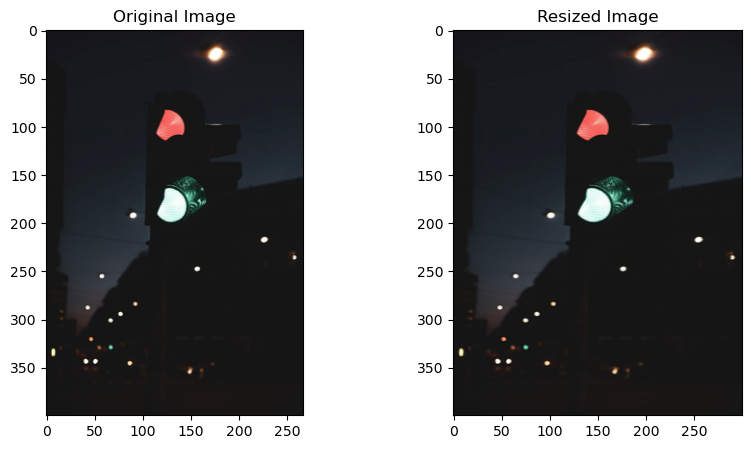

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images[0])
axes[0].set_title('Original Image')
axes[1].imshow(cv2.resize(images[0], (300, 400)))
axes[1].set_title('Resized Image')
plt.show()

In [63]:
resized_images = [cv2.resize(img, target_size) for img in images]
sizes = set([img.shape for img in resized_images])
print(sizes)

{(400, 300, 3)}


In [64]:
resized_images[0]

array([[[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       [[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       [[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       ...,

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)

In [65]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]
float_images[0]

array([[[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       [[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       [[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       ...,

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]]

In [66]:
# Normalize images to a range between 0 and 1 by dividing all pixel values by the max of 255
normalized_images = [img/255 for img in float_images]
normalized_images[0]

array([[[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0

In [67]:
X = np.array(normalized_images)
X[0]

array([[[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0

In [68]:
y_encoder = LabelEncoder().fit(labels)
y = y_encoder.transform(labels)
y[:100]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
# Split the training dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    #tf.keras.layers.RandomFlip('horizontal'),    # Random horizontal flip
    tf.keras.layers.RandomContrast(0.1),         # Random contrast
    #tf.keras.layers.RandomBrightness(0.1),       # Random brightness    
])

In [71]:
# Create an empty list for X and y augmentations
X_train_aug = []
y_train_aug = []

# Loop through the entire X_train set
for i in range(len(X_train)):
    # Select the original image and its y label
    img = X_train[i]
    label = y_train[i]

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Add 5 new images for every original
    for j in range(5):
        # Create and append the image
        X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
        # Append the original label
        y_train_aug.append(label)

# Print the length of the augmented images and the labels
print(len(X_train_aug))
print(len(y_train_aug))

3505
3505


In [72]:
# One hot encode the y data
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))

In [78]:
# Convert values to numpy arrays
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test)
y_train_aug_np = np.array(y_train_aug_enc)
y_test_np = np.array(y_test_enc)

In [79]:
# Print the total number of one_hot_encoded columns
np.array(y_train).shape

(2804, 4)

In [80]:
# Create a dictionary to store the train/test data
data = {
    'X_train': X_train_aug_np,
    'X_test': X_test_np,
    'y_train': y_train_aug_np,
    'y_test': y_test_np
}

# Save the dictionary to a pickle file
with open('signs_dict.pkl', 'wb') as f:
    pkl.dump(data, f)

In [81]:
# Load the dictionary from the pickle file
with open('signs_dict.pkl', 'rb') as f:
    data = pkl.load(f)

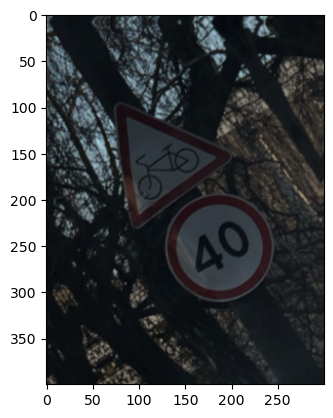

In [82]:
plt.imshow(data['X_train'][3007])

In [83]:
X_train = np.array(data['X_train'])
X_test = np.array(data['X_test'])
y_train = np.array(data['y_train'])
y_test = np.array(data['y_test'])

In [84]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(3505, 4)
(3505, 400, 300, 3)


In [91]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 300, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='sigmoid')  # 4 classes
])

In [88]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 398, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 199, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 197, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 98, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 96, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 436224)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    27,918,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,924,942 (320.15 MB)

 Trainable params: 27,974,980 (106.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,949,962 (213.43 MB)

In [92]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
# Train the model
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 53s 474ms/step - accuracy: 0.6884 - loss: 2.9951 - val_accuracy: 0.8352 - val_loss: 0.5730
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 53s 478ms/step - accuracy: 0.7879 - loss: 0.6773 - val_accuracy: 0.8239 - val_loss: 0.5508
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 51s 468ms/step - accuracy: 0.8306 - loss: 0.5279 - val_accuracy: 0.8523 - val_loss: 0.5554
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 51s 467ms/step - accuracy: 0.8771 - loss: 0.4107 - val_accuracy: 0.8352 - val_loss: 0.5560
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 52s 470ms/step - accuracy: 0.9142 - loss: 0.2803 - val_accuracy: 0.7955 - val_loss: 0.8344
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 52s 473ms/step - accuracy: 0.9546 - loss: 0.1545 - val_accuracy: 0.8239 - val_loss: 0.9477
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 52s 468ms/step - accuracy: 0.9744 - loss: 0.0821 - val_accuracy: 0.8409 - val_loss: 1.1040
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 51s 464ms/step - accuracy: 0.9900 - loss: 0

In [89]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8234 - loss: 1.4942


[1.6324139833450317, 0.8068181872367859]